In [6]:
import os
import glob
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

import torch
import numpy as np
import matplotlib.pyplot as plt

In [15]:
class CustomDataset(Dataset):
    def __init__(self, root_dir, is_train=True, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.is_train = is_train
        self.data = []
        self.labels = []

        sub_dir = 'train' if is_train else 'val'
        dataset_path = os.path.join(self.root_dir, sub_dir)

        self.class_to_idx = {cls_name: i for i,
                             cls_name in enumerate(os.listdir(dataset_path))}
        for cls_name, idx in self.class_to_idx.items():
            cls_dir = os.path.join(dataset_path, cls_name)
            for img_name in os.listdir(cls_dir):
                if img_name.lower().endswith(('png', 'jpg', 'jpeg')):
                    self.data.append(os.path.join(cls_dir, img_name))
                    self.labels.append(idx)

        print("------------------------------------")
        print(f"class : {self.class_to_idx}")
        print(f"count : {len(self.data)}")
        print("------------------------------------")

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label


In [3]:
transform = {
    'train': transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Resize((128, 128)),
                                transforms.RandomVerticalFlip(),
                                transforms.RandomHorizontalFlip(),
                                ]),
    'val': transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((128, 128)),
    ])
}

In [13]:
def show_dataloader(dataloader, num_images=4):
    plt.figure(figsize=(10, 2.5))
    col_num = num_images

    for batch_idx, (images, labels) in enumerate(dataloader):
        if batch_idx == 0:
            for i in range(min(num_images, len(images))):
                plt.subplot(1, col_num, i+1)
                plt.axis('off')
                image_np = images[i].numpy()
                image_np = np.transpose(image_np, (1, 2, 0))
                plt.imshow(image_np)
                plt.title(str(labels[i].item()))
            break

In [16]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

DATA_PATH = '/content/drive/MyDrive/dataset'
BATCH_SIZE = 128

# load train dataset
train_dataset = CustomDataset(DATA_PATH, is_train=True, transform=transform['train'])
train_loader = DataLoader(train_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=True)

Mounted at /content/drive
------------------------------------
class : {'fresh': 0, 'rotten': 1}
count : 2288
------------------------------------


In [20]:
print(train_dataset.class_to_idx)
print(len(train_dataset.class_to_idx))

{'fresh': 0, 'rotten': 1}
2


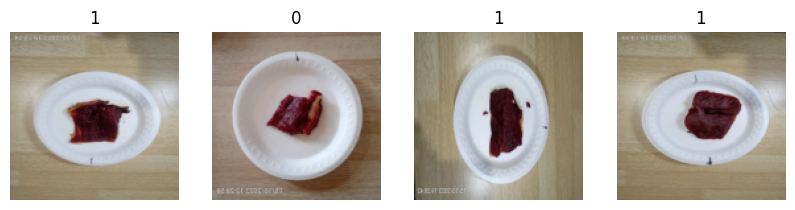

In [14]:
# show train dataset
show_dataloader(train_loader)